In [81]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly import graph_objects as go 

from keras.layers import Dense, Input
from keras.activations import tanh
from keras.models import Model, Sequential
from keras import regularizers

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [75]:
creditfraud = pd.read_csv('creditcard.csv')
creditfraud.drop(['Time'],axis=1,inplace=True)

fraud = creditfraud[creditfraud['Class'] == 1]
clean = creditfraud[creditfraud['Class'] == 0].sample(3000)
data = pd.concat([fraud,clean],axis=0)

data['Class'].value_counts()

0    3000
1     492
Name: Class, dtype: int64

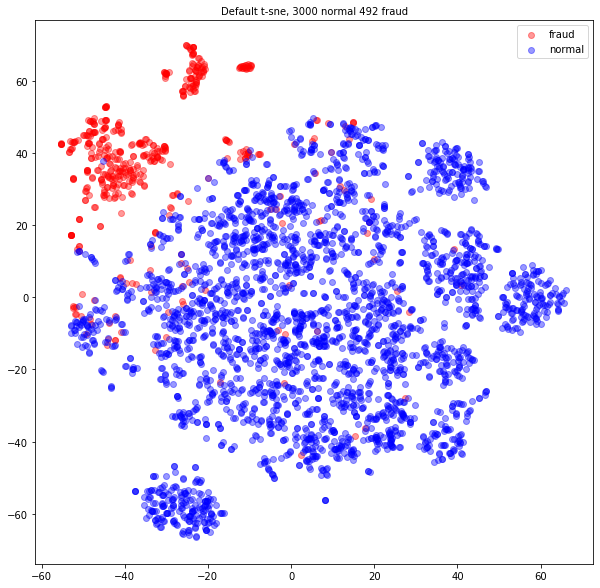

In [79]:

def tsne_plot(tsne_fit,labels, title, f_name):
    """Plots 2D t-sne"""
    fraud = tsne_fit[labels.values == 1]
    clean = tsne_fit[labels.values == 0]
    plt.figure(figsize = (10,10))

    plt.scatter(fraud[:,0],fraud[:,1],
    color = 'red',alpha=0.4,label='fraud')

    plt.scatter(clean[:,0],clean[:,1], 
    color = 'blue',alpha=0.4,label='normal')
    plt.title(title,fontsize = 10)
    plt.legend()
    plt.savefig(f_name+'.png')

targets = data['Class']
predictors = data.iloc[:,0:-1]
X = StandardScaler().fit_transform(predictors)

tsne = TSNE(learning_rate=50,random_state=42)
tsne_fit = tsne.fit_transform(X)
tsne_plot(tsne_fit,targets,'Default t-sne, 3000 normal 492 fraud', 'default')



In [ ]:
input = Input(shape=(X,shape[1],))
encode_1 = Dense(120, activation='tanh',
    activity_regularizer=regularizers.l2(l=1e-5))(input)

encode_2 = Dense(40, activation = 'relu')(encode_1)
decode_1 = Dense(40, activation = 'tanh')(encode_2)
decode_2 = Dense(120, activation = 'tanh')(decode_1)
output = Dense(shape=(X.shape[1],), activation='relu')(decode_2)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adam", loss="mse")


autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20

In [84]:
data[data['Class']==0].iloc[:,0:-1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
179265,-1.175080,0.549734,-0.255813,-1.893957,1.931975,3.991299,-0.342505,1.532956,-0.025582,-0.829015,...,-0.021792,-0.167673,-0.584904,0.231342,0.691219,-0.311625,0.317143,0.119826,0.089962,59.99
61762,1.039457,-1.047389,0.108145,-0.696471,-0.966164,-0.481186,-0.326088,-0.146512,-1.140548,0.699786,...,0.505450,0.294202,0.354611,-0.266507,0.061633,0.465064,-0.226816,-0.030704,0.035594,194.36
257924,-10.841476,-13.357772,0.781386,7.636304,8.243797,-3.193150,-2.263034,0.125763,-0.541144,2.729971,...,-1.561260,-1.028149,1.053976,11.417157,-0.162332,1.459861,0.401226,1.552543,-1.552210,113.46
90965,-0.455776,0.945752,-0.556110,0.212865,2.103071,3.700541,-0.448512,1.425345,-0.533302,-0.118620,...,0.183765,-0.173622,-0.560900,-0.009762,0.978727,0.055728,-0.385361,0.209551,0.019498,8.40
263361,-2.139225,2.642337,-2.070379,-0.637369,-0.667683,-1.032430,-0.509414,1.606661,-0.194355,0.223546,...,0.089705,0.454255,1.279852,0.076113,-0.310854,-0.470007,-0.192665,0.424256,0.302079,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255871,-5.754702,-2.866100,-2.168154,0.344235,-0.415954,-1.293933,0.514402,-0.128701,0.404527,-1.518090,...,-1.208070,0.771048,0.459511,0.089035,0.154917,0.305370,-0.521005,0.522950,-1.368464,7.06
225370,-1.396790,-0.443646,-0.139271,-0.059138,-0.489642,1.357389,3.559716,-1.173336,1.018349,0.042850,...,-0.065267,-0.844825,-0.584351,0.150954,0.668288,0.108804,-0.035940,-0.295910,-0.507115,525.54
207081,-4.841417,2.426817,-1.178618,-2.240566,-2.058814,0.794537,-4.888269,-5.996079,-1.732524,-1.674813,...,2.015144,-3.765763,0.831570,0.119808,-0.709476,0.483860,-0.383805,0.057054,0.013706,0.36
129054,-0.522037,-0.180855,1.351876,-1.371785,-1.245249,-0.378738,-0.882833,0.427841,-2.766961,0.945804,...,-0.193660,-0.254095,-0.545012,0.196605,0.031442,-0.645773,-0.363420,0.064590,0.045936,19.35
